In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import notebook
%matplotlib inline

In [54]:
def Softmax(x):
    x = np.subtract(x, np.max(x))
    ex = np.exp(x)
    
    return ex, np.sum(ex)

In [55]:
X = np.zeros((5, 5, 5))

X[:, :, 0] = [[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 0]]
X[:, :, 1] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [1, 1, 1, 1, 1]]
X[:, :, 2] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]
X[:, :, 3] = [[0, 0, 0, 1, 0], [0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0]]
X[:, :, 4] = [[1, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]

In [56]:
D = np.array([
    [[1, 0, 0, 0, 0]], [[0, 1, 0, 0, 0]], [[0, 0, 1, 0, 0]], [[0, 0, 0, 1, 0]], [[0, 0, 0, 0, 1]]
])

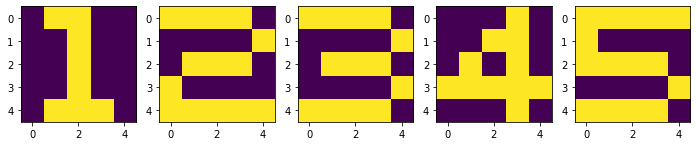

In [57]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])
plt.show()

In [58]:
def ReLU(x):
    return np.maximum(0, x)

In [59]:
def calcOutput_ReLU(w1, w2, w3, w4, x):
    v1 = np.matmul(w1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(w2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(w3, y2)
    y3 = ReLU(v3)
    v = np.matmul(w4, y3)
    y = Softmax(v)
    
    return y, v1, v2, v3, y1, y2, y3

In [60]:
def backpropagation_ReLU(d, y, w2, w3, w4, v1, v2, v3):
    e = d - y
    delta = e
    
    e3 = np.matmul(w4.T, delta)
    delta3 = (v3 > 0) * e3
    
    e2 = np.matmul(w3.T, delta3)
    delta2 = (v2 > 0) * e2
    
    e1 = np.matmul(w2.T, delta2)
    delta1 = (v1 > 0) * e1
    
    return delta, delta1, delta2, delta3

In [61]:
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, X, w1, w2, w3, w4):
    dw4 = alpha * delta * y3.T
    w4 = w4 + dw4
    
    dw3 = alpha * delta3 * y2.T
    w3 = w3 + dw3
    
    dw2 = alpha * delta2 * y1.T
    w2 = w2 + dw2
    
    dw1 = alpha * delta1 * X.T
    w1 = w1 + dw1
    
    return w1, w2, w3, w4

In [62]:
def deepReLU(w1, w2, w3, w4, X, D, alpha):
    for k in range(5):
        X = np.reshape(X[:, :, k], (25, 1))
        d = D[k, :].T
        
        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(w1, w2, w3, w4, X)
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, w2, w3, w4, v1, v2, v3)
        w1, w2, w3, w4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, X, w1, w2, w3, w4)
        
    return w1, w2, w3, w4

In [63]:
w1 = 2 * np.random.random((20, 25)) - 1
w2 = 2 * np.random.random((20, 20)) - 1
w3 = 2 * np.random.random((20, 20)) - 1
w4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01
for epoch in notebook.tqdm(range(10000)):
    w1, w2, w3, w4 = deepReLU(w1, w2, w3, w4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

/var/folders/f0/jc1nd34d035_12y6rftwr4600000gn/T/ipykernel_47760/3769364344.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e = d - y


ValueError: operands could not be broadcast together with shapes (5,2) (1,20) 